<a href="https://colab.research.google.com/github/AshishRanshinge/My_Projects/blob/master/Heart_Disease_kNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingestion

## Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Wire up Kaggle

In [10]:
import os;os.listdir("/content/gdrive/My Drive/Colab Notebooks/Individual_Project")

['kaggle.json']

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/Individual_Project/kaggle.json ~/.kaggle/kaggle.json

## Get Kaggle Heart Disease data

In [12]:
!kaggle datasets download -d ronitf/heart-disease-uci
!ls -l /content
!unzip /content/heart-disease-uci.zip

  0% 0.00/3.36k [00:00<?, ?B/s]
100% 3.36k/3.36k [00:00<00:00, 6.24MB/s]
total 12
drwx------ 4 root root 4096 Feb  6 06:22 gdrive
-rw-r--r-- 1 root root 3438 Feb  6 06:29 heart-disease-uci.zip
drwxr-xr-x 1 root root 4096 Feb  4 17:13 sample_data
Archive:  /content/heart-disease-uci.zip
  inflating: heart.csv               


# EDA

Importing the necessary packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv("/content/heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


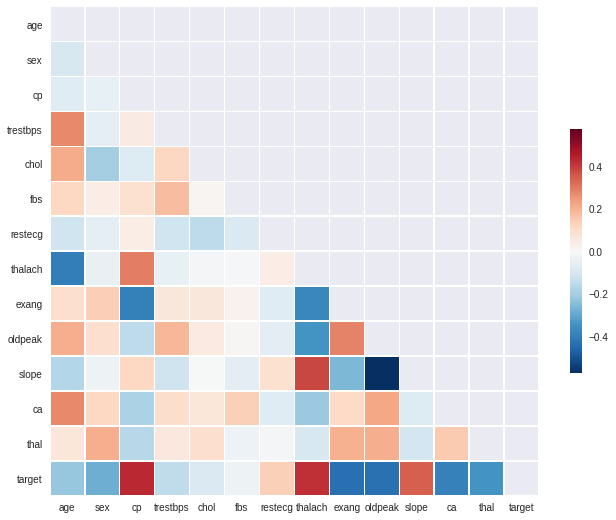

In [40]:
corr=df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(150, 10, as_cmap=True)
seq_col_brew = sns.color_palette("Blues", 4)
cmap = sns.set_palette(seq_col_brew)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

y=df['target'].values
X=df.drop('target', axis=1).values
X.shape, y.shape

((303, 13), (303,))

In [0]:
#With train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state=42, stratify=y)

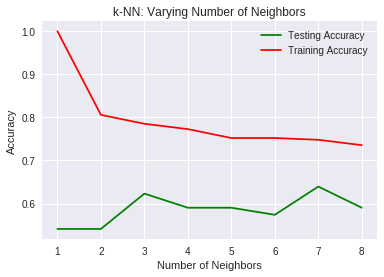

In [64]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, color='green', label = 'Testing Accuracy' )
plt.plot(neighbors, train_accuracy, color='red' ,label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [67]:
#Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.639344262295082
